# Computations using `RogueWaveInfiniteNLS.jl`

In [1]:
using Distributed
addprocs()
@everywhere using OperatorApproximation
@everywhere using RogueWaveInfiniteNLS
@everywhere using Plots
@everywhere using HDF5

Precompiling RogueWaveInfiniteNLS
  ✓ RogueWaveInfiniteNLS
  1 dependency successfully precompiled in 3 seconds. 186 already precompiled.


## Computations in the large-$X$ regime

First, take a look at the coefficients of the computed solution at $X=1500$ and $v=0.5v_{\mathrm{c}}$.

In [93]:
outnlsX, outrhpX, outrhp_solverX, outUX, outu1X, outu2X = rwio_largeX_RHP(1500.,0.5*VCRIT,1,2im,280);

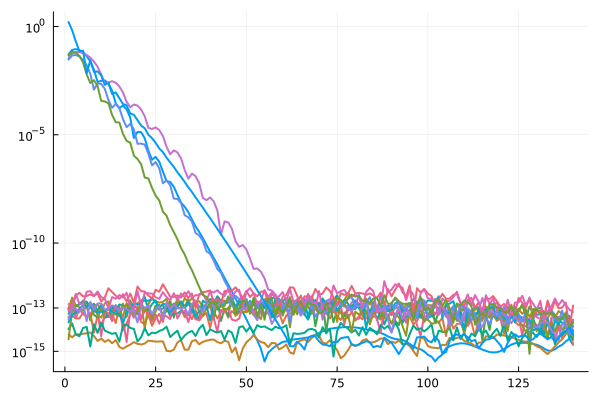

In [94]:
coefplot(outu1X[1], legend = false, linewidth= 2, yticks = yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16]) 

Compute $\Psi(X,T;\mathbf{G},\beta)$ for producing the error plot when $a=1$ and $b=1$:

In [ ]:
@everywhere vtest = 0.5*VCRIT
@everywhere Xlist = collect(200:200:6000)
@everywhere atest = 0.5*exp(1im*pi/4)
@everywhere btest = 1
@everywhere compute_rwio_largeX = X->rwio_largeX(X,vtest,atest,btest,280)

outpsiX = pmap(compute_rwio_largeX, Xlist)

# Optionally save various data to harddrive for plotting in Mathematica.
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "Xgrid", Xlist)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "vval", vtest)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "aval", atest)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "bval", btest)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "psi", outpsiX)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "realpsi", real.(outpsiX))
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "imagpsi", imag.(outpsiX))
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeX-v_0p5VCRIT.h5", "abspsi", abs.(outpsiX))

Compute $\Psi(X,T;\mathbf{G},\beta)$ for the comparison plot when $a=1$ and $b=1$:

In [ ]:
@everywhere vtest = 0.5*VCRIT
@everywhere Xlist = collect(800:10:1200)
@everywhere atest = 1
@everywhere btest = 1
@everywhere compute_rwio_largeX = X->rwio_largeX(X,vtest,atest,btest,280)

outpsiX = pmap(compute_rwio_largeX, Xlist)
# Optionally save various data to harddrive for plotting in Mathematica.
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "Xgrid", Xlist)
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "vval", vtest)
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "psi", outpsiX)
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "realpsi", real.(outpsiX))
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "imagpsi", imag.(outpsiX))
h5write("rwio-OA-a_1-b_1-largeX-v_0p5VCRIT-comparison.h5", "abspsi", abs.(outpsiX))

The computations for the plots with $a=0.5*e^{i\pi/4}$ and $b=1$ are performed in exactly the same way, just by changing the value of `atest` to `atest=0.5*exp(1im*pi/4)` in the above code snippets.

## Computations in the large-$T$ regime

First, take a look at the coefficients of the computed solution at $T=2000$  and  $w=0.5w_\mathrm{c}$.

In [104]:
outnlsT, outrhpT, outrhp_solverT, outUT, outu1T, outu2T = rwio_largeT_RHP(1200.,0.5*WCRIT,1,2im,300);

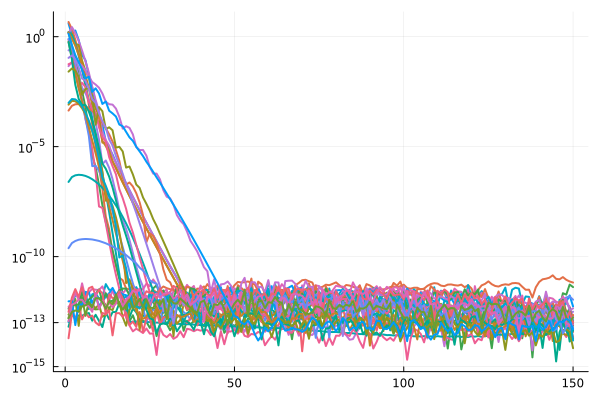

In [108]:
cptT = coefplot(outu1T[1], legend = false, linewidth= 2, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16] )

Compute $\Psi(X, T ; \mathbf{G}, \beta)$ for producing the error plot when $a=1$ and $b=1$ :

In [ ]:
wtest = 0.85*WCRIT
Tlist = collect(4000:2000:120000)
atest = 1
btest = 1
compute_rwio_largeT = T->rwio_largeT(T,wtest,atest,btest,280)

outpsiT = pmap(compute_rwio_largeT, Tlist)
# Optionally save various data to harddrive for plotting in Mathematica.
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "Tgrid", Tlist)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "wval", wtest)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "psi", outpsiT)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "aval", atest)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "bval", btest)
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "realpsi", real.(outpsiT))
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "imagpsi", imag.(outpsiT))
h5write("rwio-OA-a_0p5expiPiover4-b_1-largeT-w_0p85WCRIT.h5", "abspsi", abs.(outpsiT))

Compute $\Psi(X, T ; \mathbf{G}, \beta)$ for the comparison plot when $a=1$ and $b=1$ :

In [ ]:
wtest = 0.85*WCRIT
Tlist = collect(40000:40:41600)
atest = 1
btest = 1
compute_rwio_largeT = T->rwio_largeT(T,wtest,atest,btest,280)

outpsiT = pmap(compute_rwio_largeT, Tlist)
# Optionally save various data to harddrive for plotting in Mathematica.
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "Tgrid", Tlist)
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "wval", wtest)
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "psi", outpsiT)
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "realpsi", real.(outpsiT))
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "imagpsi", imag.(outpsiT))
h5write("rwio-OA-a_1-b_1-largeT-w_0p85WCRIT-comparison.h5", "abspsi", abs.(outpsiT))

The computations for the plots with $a=0.5*e^{i\pi/4}$ and $b=1$ are performed in exactly the same way, just by changing the value of `atest` to `atest=0.5*exp(1im*pi/4)` in the above code snippets.

## Computations in the Painlevé regime

First, take a look at the coefficients of the computed solution at  $X=4000$  and  $w=w_\mathrm{c}$ (or, equivalently $v=v_\mathrm{c}$). These choices determine the value of $T$.

In [87]:
outnlsPain, outrhpPain, outrhp_solverPain, outUPain, outu1Pain, outu2Pain = rwio_Painleve_RHP(1000.,VCRIT,1,2im,300);

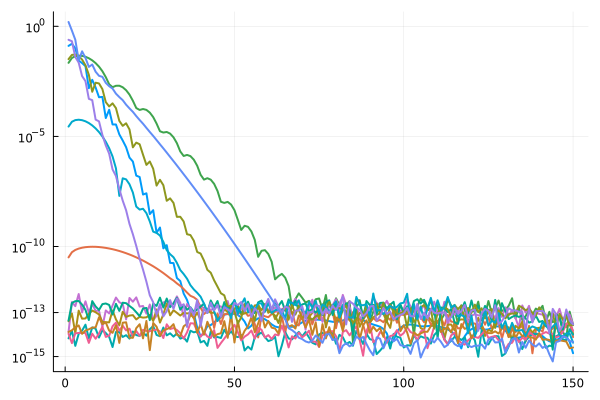

In [89]:
cptPain = coefplot(outu1Pain[1], legend = false, linewidth= 2, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16])

## Computing for the error plot in the Painlevé region.

This computes the rogue wave of infinite order along the transitional curve $v=v_{\mathrm{c}}$ for different values of $X$ with $a=1$ and $b=1$.

In [47]:
Xtest = 2000
outpsiP2 = rwio_Painleve(Xtest,VCRIT,1,1,300)

-0.003602405446172712 + 0.0011406833232509965im

## Overlap check near the origin in the $(X,T)$-plane

In [43]:
Xval = 1.
vval = 0.8*VCRIT
Tval = TfromXv(Xval,vval)

0.10886621079036347

In [45]:
abs(rwio_nodeformation_rescaled(Xval,Tval,1,2im,800)-rwio_largeX(Xval,vval,1,2im,280))

3.784797839067842e-13

In [46]:
Xval = 1.
vval = 0.1*VCRIT
Tval = TfromXv(Xval,vval)

0.013608276348795434

In [47]:
abs(rwio_nodeformation_rescaled(Xval,Tval,1,2im,800)-rwio_largeX(Xval,vval,1,2im,280))

3.5749182362651225e-13

In [29]:
rwio_nodeformation_rescaled(Xval,Tval,1,2im,800)

0.04938520642986486 + 0.8937290633559334im

In [65]:
Tval = 1.
wval = 0.8*WCRIT
Xval = XfromTw(Tval,wval)

3.0238105197476957

In [67]:
abs(rwio_nodeformation_rescaled(Xval,Tval,1,2im,800)-rwio_largeT(Tval,wval,1,2im,280))

1.5685785522111634e-13

In [51]:
Tval = 1.
wval = 0.1*WCRIT
Xval = XfromTw(Tval,wval)

0.37797631496846196

In [53]:
abs(rwio_nodeformation_rescaled(Xval,Tval,1,2im,800)-rwio_largeT(Tval,wval,1,2im,280))

6.467885900866133e-14

In [69]:
Xval = 1.
vval = VCRIT
Tval = TfromXv(Xval,vval)

0.13608276348795434

In [71]:
abs(rwio_nodeformation_rescaled(Xval,Tval,1,2im,800)-rwio_Painleve(Xval,vval,1,2im,280))

2.4340993547656853e-13

In [119]:
Tval

0.13608276348795434

## Painlevé check from both sides

In [3]:
Xval = 2000
vval = 0.98*VCRIT
abs(rwio_largeX(Xval,vval,1,2im,280)-rwio_Painleve(Xval,vval,1,2im,280))

1.5436906930782975e-15

In [7]:
Xval = 2000
vval = 1.05*VCRIT
Tval = TfromXv(Xval,vval)
wval = wfromXT(Xval,Tval)
abs(rwio_largeT(Tval,wval,1,2im,280)-rwio_Painleve(Xval,vval,1,2im,280))

1.0412793661344947e-14

## No deformations

In [110]:
outnlsND, outrhpND, outrhp_solverND, outUND, outu1ND, outu2ND = rwio_nodeformation_rescaled_RHP(0.,0,1,2im,800);

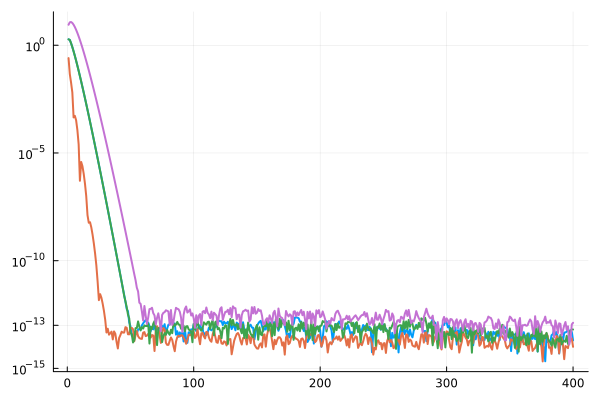

In [111]:
cptnodef1 = coefplot(outu1ND[1], legend = false, linewidth = 2, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16])

Increase the value of $T$ up to $T_{\mathrm{max}}=8$ while working with the rescaled undeformed RHP and check the decay rate of the coefficients.

In [119]:
outnlsND2, outrhpND2, outrhp_solverND2, outUND2, outu1ND2, outu2ND2 = rwio_nodeformation_rescaled_RHP(4.,8.,1,2im,800);

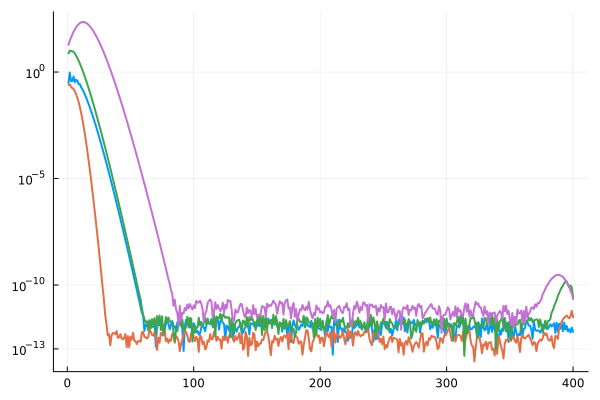

In [120]:
cptnodef2 = coefplot(outu1ND2[1], legend = false, linewidth = 2, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16])